In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from mpl_toolkits.axes_grid1 import ImageGrid,make_axes_locatable,host_subplot
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
import sys
import os
import pyPIPS.utils as utils
import pyPIPS.thermolib as thermo
import pyPIPS.DSDlib as dsd
#import pyPIPS.disdrometer_module as dis
import pyPIPS.plotmodule as PIPSplot
import pyPIPS.simulator as sim
import pyPIPS.pips_io as pipsio
import pyPIPS.PIPS as pips
import pyPIPS.parsivel_params as pp
import pyPIPS.parsivel_qc as pqc
import pyPIPS.radarmodule as radar
from pyCRMtools.modules import plotmodule as plotmod
from pyCRMtools.modules import utils as CRMutils
from pyCRMtools.pycaps import arps_read
from pyCRMtools.pycaps import pycaps_fields
from pyCRMtools.pycaps import calvars_radar as pycaps_radar
import pandas as pd
import xarray as xr
import glob
import numpy.random as random
from scipy.stats import gamma, uniform
from scipy.special import gamma as gammafunc
from scipy import ndimage
from metpy.plots import StationPlot
from metpy.calc import wind_components
from metpy.cbook import get_test_data
from metpy.plots import StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
PIPS_dir = '/Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019'
parsivel_combined_filename = 'parsivel_combined_TriPIPS_092719_TriPIPS_10s.nc'
parsivel_combined_path = os.path.join(PIPS_dir, parsivel_combined_filename)
parsivel_combined_ds = xr.open_dataset(parsivel_combined_path)

In [3]:
from natsort import natsorted
radar_name = 'KIND'
radar_dir = '/Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927'
radar_paths = glob.glob(radar_dir + '/cfrad.*')
radar_paths = natsorted(radar_paths)

In [4]:
sweeptime_start = radar._getsweeptime(radar_paths[0])
sweeptime_stop = radar._getsweeptime(radar_paths[-1])
print(sweeptime_start, sweeptime_stop)

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


2019-09-27 17:05:11 2019-09-27 21:01:03


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


In [8]:
starttime = '20190927190000'
stoptime = '20190927204500'

radar_dict = radar.read_sweeps(radar_paths, starttime, stoptime)
print(radar_dict['radarsweeplist'])

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY

Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_190206.991_to_20190927_190620.367_KIND_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:02:06 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_190751.506_to_20190927_191209.708_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:07:51 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_191339.859_to_20190927_191753.730_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:13:39 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_191927.556_to_20190927_192353.130_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:19:27 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_192525.066_to_20190927_192959.274_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:25:25 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_193129.878_to_20190927_193548.760_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:31:29 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_193721.866_to_20190927_194146.804_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:37:21 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_194318.917_to_20190927_194737.267_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:43:18 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_194910.891_to_20190927_195335.647_KIND_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:49:10 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_195509.660_to_20190927_195934.830_KIND_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 19:55:09 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_200109.321_to_20190927_200534.621_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 20:01:09 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_200704.727_to_20190927_201118.510_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 20:07:04 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_201252.367_to_20190927_201717.136_KIND_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 20:12:52 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_201851.103_to_20190927_202331.551_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 20:18:51 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_202505.097_to_20190927_202929.990_KIND_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 20:25:05 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_203102.682_to_20190927_203536.539_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 20:31:02 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_203706.096_to_20190927_204134.811_KIND_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 20:37:06 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/TriPIPS/2019/NEXRAD/09/27/CFRadial/20190927/cfrad.20190927_204304.730_to_20190927_204733.927_KIND_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2019-09-27 20:43:04 
Number of gates:  1832
Radar lat,lon,alt [39.70750046] [-86.28028107] [270.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
[<pyart.core.radar.Radar object at 0x7fcd54ab7c50>, <pyart.core.radar.Radar object at 0x7fcd66831908>, <pyart.core.radar.Radar object at 0x7fce01e030b8>, <pyart.core.radar.Radar object at 0x7fcd54acfba8>, <pyart.core.radar.Radar object at 0x7fcdc2f25ef0>, <pyart.core.radar.Radar object at 0x7fcd57fa5320>, <pyart.core.radar.Radar object at 0x7fcd57fdef60>, <pyart.core.radar.Radar object at 0x7fce10afae80>, <pyart.core.radar.Radar object at 0x7fce10407ef0>, <pyart.core.radar.Radar object at 0x7fcd54ae5eb8>, <pyart.core.radar.Radar object at 0x7fcdc1a554e0>, <pyart.core.radar.Radar object at 0x7fcd54b2d278>, <pyart.core.radar.Radar object at 0x7fce01fcbcf8>, <pyart.core.radar.Radar object at 0x7fcd54b31358>, <p

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


In [9]:
# GPS_stats = conv_df['GPS_status']
# GPS_lats = conv_df['GPS_lat']
# GPS_lons = conv_df['GPS_lon']
# GPS_alts = conv_df['GPS_alt']
# PIPS_lat, PIPS_lon, PIPS_alt = pipsio.get_PIPS_loc(GPS_stats, GPS_lats, GPS_lons, GPS_alts)
PIPS_loc_str = parsivel_combined_ds.location
PIPS_lat, PIPS_lon, PIPS_alt = list(map(np.float, PIPS_loc_str.strip('()').split(',')))
PIPS_rad_loc = radar.get_PIPS_loc_relative_to_radar((PIPS_lat, PIPS_lon), radar_dict['radarsweeplist'][0])
print(PIPS_rad_loc)

-86.99165 40.47489
(-60172.218003961156, 85569.71333910321)


In [26]:
print(radar_dict['radarsweeplist'][0].info())

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: altitude
	units: meters
	_FillValue: -9999.0
	positive: up
altitude_agl:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: altitude_above_ground_level
	units: meters
	_FillValue: -9999.0
	positive: up
antenna_transition:
	data: <ndarray of type: int8 and shape: (720,)>
	long_name: antenna_is_in_transition_between_sweeps
	units: 
	_FillValue: -128
	comment: 1 if antenna is in transition, 0 otherwise
azimuth:
	data: <ndarray of type: float32 and shape: (720,)>
	long_name: ray_azimuth_angle
	units: degrees
	_FillValue: -9999.0
elevation:
	data: <ndarray of type: float32 and shape: (720,)>
	long_name: ray_elevation_angle
	units: degrees
	_FillValue: -9999.0
	positive: up
fields:
	REF:
		data: <ndarray of type: float32 and shape: (720, 1832)>
		long_name: radar_reflectivity
		standard_name: equivalent_reflectivity_factor
		units: dBZ
		sampling_ratio: 1.0
		_FillValue: -128
		grid_mapping: grid_mapping
		coo

		_FillValue: -9999.0
	r_calib_noise_source_power_v:
		data: <ndarray of type: float32 and shape: (1,)>
		long_name: radar_calibration_noise_source_power_v_channel
		units: dBm
		meta_group: radar_calibration
		_FillValue: -9999.0
	r_calib_power_measure_loss_h:
		data: <ndarray of type: float32 and shape: (1,)>
		long_name: radar_calibration_power_measurement_loss_h_channel
		units: db
		meta_group: radar_calibration
		_FillValue: -9999.0
	r_calib_power_measure_loss_v:
		data: <ndarray of type: float32 and shape: (1,)>
		long_name: radar_calibration_power_measurement_loss_v_channel
		units: db
		meta_group: radar_calibration
		_FillValue: -9999.0
	r_calib_coupler_forward_loss_h:
		data: <ndarray of type: float32 and shape: (1,)>
		long_name: radar_calibration_coupler_forward_loss_h_channel
		units: db
		meta_group: radar_calibration
		_FillValue: -9999.0
	r_calib_coupler_forward_loss_v:
		data: <ndarray of type: float32 and shape: (1,)>
		long_name: radar_calibration_coupler_forward_lo

611 410
-70172.21800396116 -50172.218003961156 75569.71333910321 95569.71333910321
Time:  2019-09-27 19:02:06.991
Elevation:  0.48339844


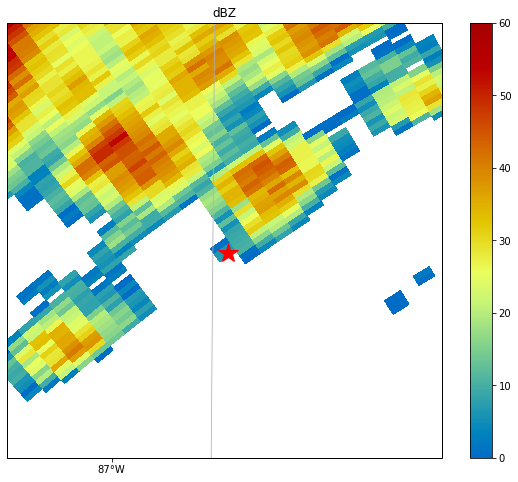

In [39]:
import pyart
import cartopy.crs as ccrs

for radar_obj in radar_dict['radarsweeplist'][:1]:
    
    xrad, yrad, zrad = radar_obj.get_gate_x_y_z(0)
    distance = np.sqrt((PIPS_rad_loc[0] - xrad)**2. + (PIPS_rad_loc[1] - yrad)**2.)
    theta_index, range_index = np.unravel_index(distance.argmin(), distance.shape)

    print(theta_index, range_index)

    display = pyart.graph.RadarMapDisplay(radar_obj)
    fig = plt.figure(figsize=(10, 8))

    projection = ccrs.LambertConformal(central_latitude=radar_obj.latitude['data'][0],
                                       central_longitude=radar_obj.longitude['data'][0])
    
    # Get bounds relative to PIPS location
    xmin = PIPS_rad_loc[0] - 10000.
    xmax = PIPS_rad_loc[0] + 10000.
    ymin = PIPS_rad_loc[1] - 10000.
    ymax = PIPS_rad_loc[1] + 10000.
    # Convert to lat/lon bounds
    
    print(xmin, xmax, ymin, ymax)
    
#     projection = ccrs.LambertConformal(central_latitude=PIPS_lat,
#                                        central_longitude=PIPS_lon)
    # plot reflectivity
    ax = fig.add_subplot(111)
    print("Time: ", radar_obj.metadata['start_time'])
    print("Elevation: ", radar_obj.elevation['data'][-1])
    display.plot_ppi_map('REF', 0, title='dBZ', cmap='pyart_HomeyerRainbow',
                         vmin=0, vmax=60, colorbar_label='', ax=ax, resolution='10m', projection=projection,
                         fig=fig)
                         # min_lon=-88., max_lon=-86., min_lat=40., max_lat=41.)
    # plot ZDR
    
#     display.plot('ZDR', 0, title='ZDR',
#                  vmin=0, vmax=6, colorbar_label='', ax=ax)
    display.plot_range_ring(radar_obj.range['data'][-1]/1000., ax=ax)
    #display.set_limits(xlim=(-250, 250), ylim=(-250, 250))
    #display.set_limits(xlim=(-75, -55), ylim=(75, 95), ax=ax)
    display.plot_point(PIPS_lon, PIPS_lat, 'r*', ms=20)
    display.ax.set_extent([xmin, xmax, ymin, ymax], crs=projection)
    #ax.plot(PIPS_rad_loc[0]/1000., PIPS_rad_loc[1]/1000., 'r*', ms=20)
    #ax.plot(xrad[theta_index, range_index]/1000., yrad[theta_index, range_index]/1000., 'rx')
    #ax.contourf(xrad / 1000., yrad / 1000., distance)
    #ax.text(PIPS_rad_loc[0] / 1000. - 5., PIPS_rad_loc[1] / 1000., 'PIPS1A', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

In [40]:
radar_obj = radar_dict['radarsweeplist'][0]
print(radar_obj.info())

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: altitude
	units: meters
	_FillValue: -9999.0
	positive: up
altitude_agl:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: altitude_above_ground_level
	units: meters
	_FillValue: -9999.0
	positive: up
antenna_transition:
	data: <ndarray of type: int8 and shape: (720,)>
	long_name: antenna_is_in_transition_between_sweeps
	units: 
	_FillValue: -128
	comment: 1 if antenna is in transition, 0 otherwise
azimuth:
	data: <ndarray of type: float32 and shape: (720,)>
	long_name: ray_azimuth_angle
	units: degrees
	_FillValue: -9999.0
elevation:
	data: <ndarray of type: float32 and shape: (720,)>
	long_name: ray_elevation_angle
	units: degrees
	_FillValue: -9999.0
	positive: up
fields:
	REF:
		data: <ndarray of type: float32 and shape: (720, 1832)>
		long_name: radar_reflectivity
		standard_name: equivalent_reflectivity_factor
		units: dBZ
		sampling_ratio: 1.0
		_FillValue: -128
		grid_mapping: grid_mapping
		coo